# Example: Compute the Probability of Profit for a Single Options Contract
Suppose we sold a `DTE = 65-day` put option on `TSLA,` with a strike price of `K = 250 USD/share`, collecting the mid-point premium of `P = 73.25 USD/share` for the sale. Let's use options data and projections of the `TSLA` share price to compute the breakeven point for the contract, i.e., the value of the `TSLA` share price where you start to lose money and the probability of profit (PoP) for the contract.

## Learning objectives
This worked example will familiarize students with probability of profit (PoP) calculations for single options contracts. 
* __Prerequisites__: Before we do any calculations, we'll set values for the `TSLA` contract used in this example, i.e., observed values for the share price, premium, implied volatility, etc.
* __Task 1: Compute breakeven share price__: Next, we'll use our understanding of options contracts and the problem data to compute the breakeven share price for the example `put` contract.
    * `Check`: Are the computed and observed breakeven points equal?
* __Task 2: Estimate the future share price of the underlying asset__: Next, we'll use two approaches: a risk-neutral geometric Brownian motion and a back-of-the-envelope estimate using the implied volatility. Both approaches produce a distribution of future share prices that we can use to compute the probability that the price is above or below the break-even share price.
    * `TODO`: Construct a single asset gbm model of TSLA shares assuming a risk-neutral measure using historical volatility. This model can be sampled to produce a future share price distribution.
    * `TODO`: Construct an approximate future share price projection using the implied volatility.
* __Task 3: Estimate the probability of profit for a TSLA put contract__: Using the price distributions computed in _task 2_, we'll compute the probability of profit for the `put` option from the buyers and sellers pers

## Setup
Set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

In [10]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-2/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-2`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-2/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CH

## Prerequisites
Before doing anything else, let's set values for our test `put` option, which was gathered after the market closed on `06-12-2024.` In this example, we'll use options pricing data for a `DTE = 65 day` put option on [Tesla](https://finance.yahoo.com/quote/TSLA/) as the underlying asset, with a strike price of `K = 250.0.`

In [104]:
DTE = 65.0; # days to expiration
Sₒ = 178.0; # TSLA underlying share price USD/share
IV = 58.64; # implied volatility
Δt = (1/252); # Time step 1-day
K = 250.0; # strike price for put contract
P = 73.25; # midpoint premium
B = 176.75; # observed midpoint price for put contract
POP = 0.4705; # probability of profit for short put
risk_free_rate = 0.0431; # yield 10-year treasury note on 13-Jun-2024

## Task 1: Compute the break-even points for a short TSLA put
Suppose you sold a `DTE = 65-day` put option on `TSLA,` and you collected the mid-point premium for the sale. Let's use options data  to compute the breakeven point for the contract, i.e., the value of the `TSLA` share price where you start to lose money on the trade as a function of the strike price `K.` 

In [37]:
computed_breakeven_price = K - P;

### Check: Are the computed and observed breakeven points equal?
Fill me in

In [41]:
@assert isapprox(B, computed_breakeven_price)

## Task 2: Estimate the future share price of the underlying asset

single asset geometric Brownian motion model of share price
Fill me in

### TODO: Construct single asset gbm model of TSLA shares

In [118]:
parameters_df = CSV.read(joinpath(_PATH_TO_DATA, "gbmparameters", "Parameters-SP500-2018-2023.csv"), DataFrame);

In [67]:
model = build(MyGeometricBrownianMotionEquityModel, (
    μ = risk_free_rate,
    σ = filter(:ticker=> x-> x=="TSLA", parameters_df)[!,:volatility] |> first # historical volatility
));

Sample

In [65]:
number_of_samples = 5000;
endpoint = VLQuantitativeFinancePackage.sample(model, (
    T₁ = 0.0,
    T₂ = (DTE)*(Δt),
    Δt = Δt,
    Sₒ = Sₒ
), number_of_paths = number_of_samples) |> samples -> samples[end,2:end]; # get last row from col 2 -> number_of_paths

`Unhide` me

In [72]:
d_gbm = fit_mle(LogNormal, endpoint)

LogNormal{Float64}(μ=5.156971693437033, σ=0.28212728268934406)

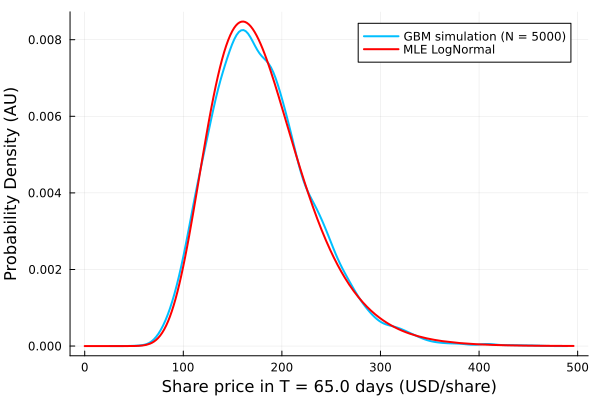

In [79]:
let
    density(endpoint, lw=2, c=:deepskyblue1, label="GBM simulation (N = 5000)")
    plot!(d_gbm, lw=2, label="MLE LogNormal", c=:red)
    xlabel!("Share price in T = $(DTE) days (USD/share)", fontsize=18)
    ylabel!("Probability Density (AU)", fontsize=18)
end

### TODO: Future share price projection using the implied volatility
Fill me in

In [85]:
d_IV = Normal(Sₒ, Sₒ*(IV/100)*sqrt(DTE*Δt));

`Unhide` me

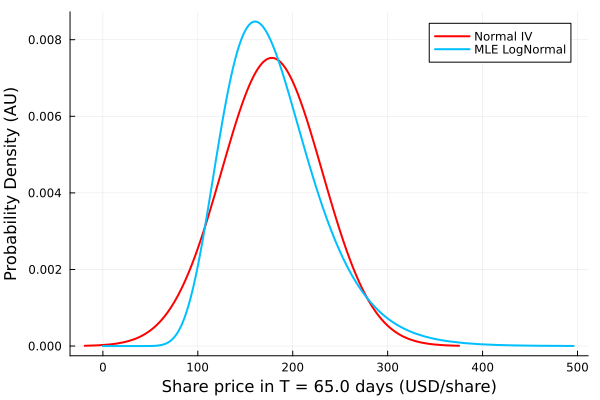

In [94]:
let
    plot(d_IV, lw=2, label="Normal IV", c=:red)
    plot!(d_gbm, lw=2, label="MLE LogNormal", c=:deepskyblue1)
    xlabel!("Share price in T = $(DTE) days (USD/share)", fontsize=18)
    ylabel!("Probability Density (AU)", fontsize=18)
end

## Task 4: Estimate the probability of profit for a TSLA put contract
There are two cases that we consider when exploring the probability of profit: the buyer's and seller's perspectives:
* __Buyer's perspective__: the `TSLA` share price `T` days from now $S(T)$, must be _less than_ the breakeven price $\mathcal{B}_{p}$ for the `put` contract to be profitable. Thus, the probability of profit can be calculated directly from the [cumulative distribution function of the share price](https://en.wikipedia.org/wiki/Cumulative_distribution_function), i.e., $F_{S}(\mathcal{B}_{p}) = P(S\leq{B}_{p})$.
* __Seller's perspective__: the `TSLA` share price `T` days from now $S(T)$, must be _greater than_ the breakeven price $\mathcal{B}_{p}$ for the `put` contract to be profitable. Thus, the probability of profit can be calculated from the [complementary cumulative distribution function of the share price](https://en.wikipedia.org/wiki/Cumulative_distribution_function), i.e., $P(S>{B}_{p}) = 1 - F_{S}(\mathcal{B}_{p})$.

We can query the [cumulative distribution function $F_{S}(\mathcal{B})$]() using the [cdf(...) function exported by the Distributions.jl package](https://github.com/JuliaStats/Distributions.jl?tab=readme-ov-file). We can sample the cdf for both the projected geometric Brownian motion model and the Implied Volatility price distributions.

### TODO: Probability of profit (PoP) table
`Unhide` the code block below to see how we developed a table displaying the probability of profit calculations using the risk-neutral geometric Brownian motion and IV-based price distributions. 

In [160]:
let 
    table_df = DataFrame()

    # buyer -
    buyer_row_df = (
        sense = "buyer",
        ticker = "TSLA",
        DTE = 65,
        Sₒ = Sₒ,
        K = K,
        B = B,
        POP_GBM = cdf(d_gbm, B),
        POP_IV = cdf(d_IV, B),
        POP_observed = 1 - POP
    );
    push!(table_df, buyer_row_df)
    
    # seller -
    seller_row_df = (
        sense = "seller",
        ticker = "TSLA",
        DTE = 65,
        Sₒ = Sₒ,
        K = K,
        B = B,
        POP_GBM = 1 - cdf(d_gbm, B),
        POP_IV = 1 - cdf(d_IV, B),
        POP_observed = POP
    );
    push!(table_df, seller_row_df)
end

Row,sense,ticker,DTE,Sₒ,K,B,POP_GBM,POP_IV,POP_observed
,String,String,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,buyer,TSLA,65,178.0,250.0,176.75,0.525103,0.490594,0.5295
2,seller,TSLA,65,178.0,250.0,176.75,0.474897,0.509406,0.4705


## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. You should decide solely based on your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.